<a href="https://colab.research.google.com/github/ir1ss/DeepLearningWithPython/blob/main/newswireClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import reuters

In [5]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [4]:
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

In [6]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [7]:
def to_one_hot(labels, dimension = 46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results

In [9]:
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [12]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [13]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

In [15]:
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [17]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/20
16/16 [==============================] - 2s 64ms/step - loss: 3.0452 - accuracy: 0.4029 - val_loss: 1.6785 - val_accuracy: 0.6380
Epoch 2/20
16/16 [==============================] - 1s 47ms/step - loss: 1.4705 - accuracy: 0.6935 - val_loss: 1.2990 - val_accuracy: 0.7080
Epoch 3/20
16/16 [==============================] - 1s 54ms/step - loss: 1.0781 - accuracy: 0.7717 - val_loss: 1.1368 - val_accuracy: 0.7510
Epoch 4/20
16/16 [==============================] - 1s 61ms/step - loss: 0.8391 - accuracy: 0.8169 - val_loss: 1.0697 - val_accuracy: 0.7550
Epoch 5/20
16/16 [==============================] - 1s 59ms/step - loss: 0.6708 - accuracy: 0.8519 - val_loss: 0.9618 - val_accuracy: 0.7820
Epoch 6/20
16/16 [==============================] - 1s 60ms/step - loss: 0.5126 - accuracy: 0.8879 - val_loss: 0.9089 - val_accuracy: 0.8100
Epoch 7/20
16/16 [==============================] - 1s 55ms/step - loss: 0.4197 - accuracy: 0.9122 - val_loss: 0.8888 - val_accuracy: 0.8060
Epoch 8/20
16

In [20]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

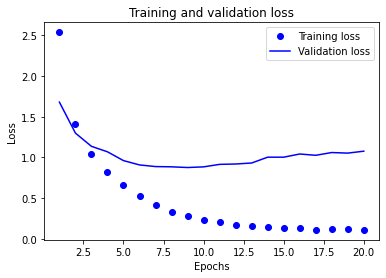

In [22]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

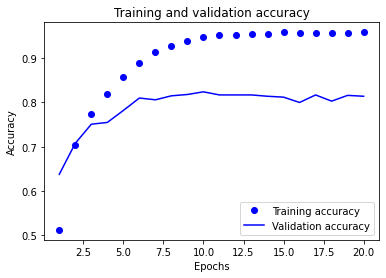

In [23]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [31]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [33]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [34]:
model.fit(
    partial_x_train,
    partial_y_train,
    epochs=9,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/9
16/16 [==============================] - 1s 60ms/step - loss: 3.1636 - accuracy: 0.4263 - val_loss: 1.7234 - val_accuracy: 0.6550
Epoch 2/9
16/16 [==============================] - 1s 48ms/step - loss: 1.4739 - accuracy: 0.7032 - val_loss: 1.2744 - val_accuracy: 0.7290
Epoch 3/9
16/16 [==============================] - 1s 50ms/step - loss: 1.0150 - accuracy: 0.7848 - val_loss: 1.1450 - val_accuracy: 0.7420
Epoch 4/9
16/16 [==============================] - 1s 49ms/step - loss: 0.7993 - accuracy: 0.8301 - val_loss: 1.0161 - val_accuracy: 0.7910
Epoch 5/9
16/16 [==============================] - 1s 48ms/step - loss: 0.6207 - accuracy: 0.8678 - val_loss: 0.9557 - val_accuracy: 0.7930
Epoch 6/9
16/16 [==============================] - 1s 48ms/step - loss: 0.4812 - accuracy: 0.9005 - val_loss: 0.9225 - val_accuracy: 0.8070
Epoch 7/9
16/16 [==============================] - 1s 48ms/step - loss: 0.3998 - accuracy: 0.9183 - val_loss: 0.8859 - val_accuracy: 0.8140
Epoch 8/9
16/16 [===

In [35]:
results = model.evaluate(x_test, one_hot_test_labels)

71/71 [==============================] - 0s 3ms/step - loss: 0.9621 - accuracy: 0.7903


In [36]:
predictions = model.predict(x_test)

In [37]:
predictions[0].shape

(46,)

In [38]:
np.sum(predictions[0])

1.0

In [39]:
np.argmax(predictions[0])

3